<a href="https://colab.research.google.com/github/Nicolas-HGS/Images-Digital-Processing/blob/main/Convolution_with_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORT OF LIBRARIES AND MODULES

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Define the variable Img as an ndarray (n-dimensional array) from loadind the image contained in the "colorido.jpg" file

Img = cv2.imread("colorido.jpg")

# Convolution mask

Mascara = np.array([
    [0,0,2],            # Mask example
    [0,1,3/10],
    [5/20,0,-1]
])

# Img_convolvida is the variable to which the result of convolution process will be attributed

Img_convolvida = Img.copy()

# Variable on which the convolution will be performed,
# note that it has one more layer of pixels with elements equal to zero in the entire image,
# getting larger dimensions than the original image.

# The reason for this is so that the image resulting from convolution process has the same dimensions
# than original image, since the image resulting from the convolution operation has smaller dimensions
# than the image which the convolution is being applied

Img_padding = np.zeros((Img.shape[0] + 2, Img.shape[1] + 2, 3), dtype=np.uint8)

# After the array of zeros with three channels has been created, the content of the original image
# is assigned to the parts inside it

Img_padding[1:-1,1:-1] = Img

In [2]:
# Loop start for convolution operation

# Observe the scan interval, anything make a manual drawing to understand the reason for the interval
for x in range (0, Img_padding.shape[0]-2):
    for y in range(0, Img_padding.shape[1]-2):
        # Contains the sum of the products between the image to be convolved and the mask in each
        # of the channels of color
        soma_canal_zero = 0
        soma_canal_um = 0
        soma_canal_dois = 0

        # Loop for mask multiplication
        for x_mascara in range (0, Mascara.shape[0]):
            for y_mascara in range(0, Mascara.shape[1]):
                # Assignment of elements to be multiplied both the mask and the image
                a = (Img_padding[x+x_mascara, y+y_mascara][0])
                b = (Mascara[x_mascara, y_mascara])
                # Product of the zero channel component, accumlating with loop iterations
                soma_canal_zero = (a * b + soma_canal_zero)
                # Same logic as the previous step for channel one
                a = (Img_padding[x+x_mascara, y+y_mascara][1])
                b = (Mascara[x_mascara, y_mascara])
                soma_canal_um = (a * b + soma_canal_um)
                # Same logic as the previous step for channel two
                a = (Img_padding[x+x_mascara, y+y_mascara][2])
                b = (Mascara[x_mascara, y_mascara])
                soma_canal_dois = (a * b + soma_canal_dois)
        # Define the maximum pixel value limit
        if soma_canal_zero > 255:
            soma_canal_zero = 255

        if soma_canal_um > 255:
            soma_canal_um = 255

        if soma_canal_dois > 255:
            soma_canal_dois = 255
        # Define the minimum pixel value limit
        if soma_canal_zero < 0:
            soma_canal_zero = 0

        if soma_canal_um < 0:
            soma_canal_um = 0

        if soma_canal_dois < 0:
            soma_canal_dois = 0

        # Converting the values resultant from the convolution to integers after rounding them
        soma_canal_zero = int(round(soma_canal_zero))
        soma_canal_um = int(round(soma_canal_um))
        soma_canal_dois = int(round(soma_canal_dois))
        # Values that make up the pixel in position x,y
        Img_convolvida[x, y] = (soma_canal_zero,soma_canal_um,soma_canal_dois)

In [5]:
# Choosing a pixel from the image to check if the results obtained are in match with the expected

# Position of the chosen pixel for checking

q = 120
w = 130

# Visualization of the chosen pixel and the adjacent pixels before convolution

print(Img[q,w])
print(Img[q,w+1])
print(Img[q,w-1])
print(Img[q+1,w])
print(Img[q+1,w+1])
print(Img[q+1,w-1])
print(Img[q-1,w])
print(Img[q-1,w+1])
print(Img[q-1,w-1])

# View the chosen pixel after the convolution operation, use theory
# to check if it is right

print(Img_convolvida[q,w], 'chosen pixel')

[ 77 176  36]
[ 77 177  35]
[ 77 177  35]
[ 77 176  36]
[ 77 176  36]
[ 77 176  36]
[ 77 177  35]
[ 77 178  33]
[ 77 178  33]
[196 255  86] chosen pixel


In [4]:
# Convolution by library function

Img_convolvida_opencv = cv2.filter2D(src=Img, ddepth=-1, kernel=Mascara)

# Display of the previously chosen pixel in the image resultanting from convolution
# by the library function

print(Img_convolvida_opencv[q,w])

[196 255  86]


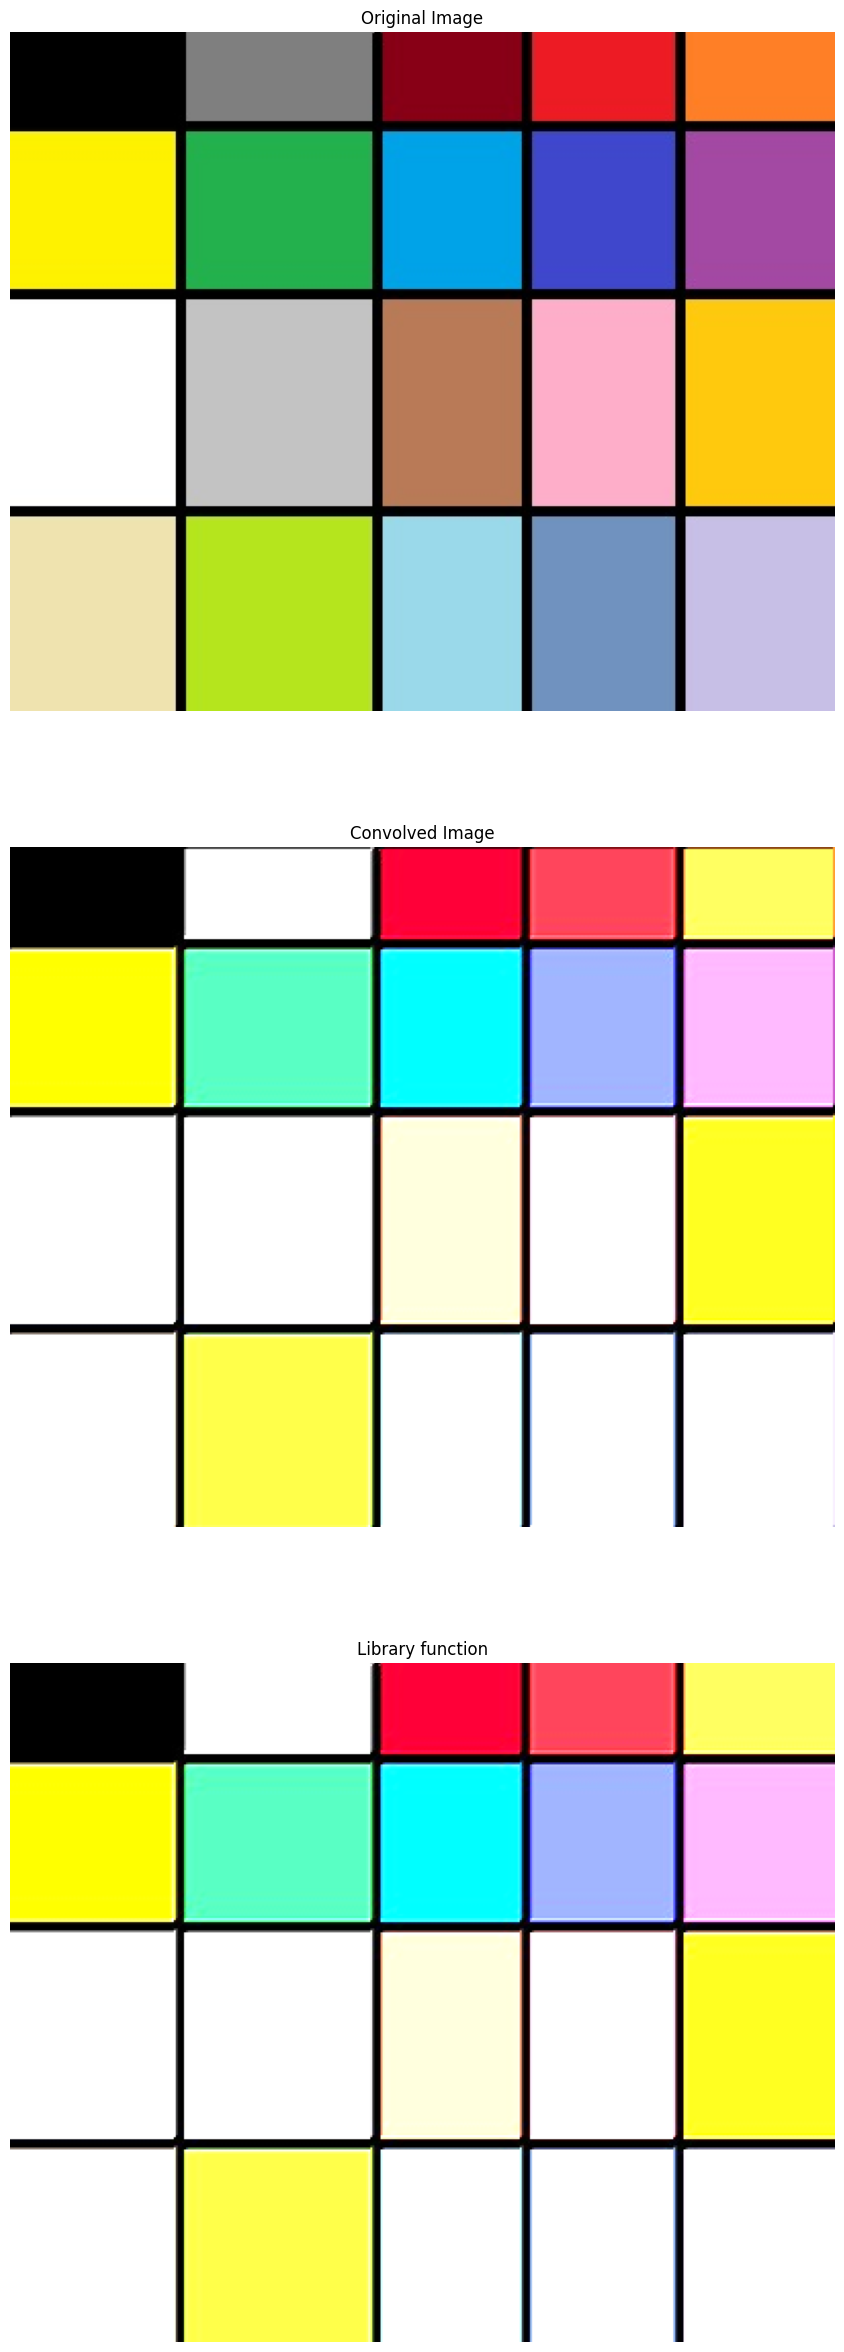

In [7]:
# Set the figure size in inches, adjusting the displayed widght and height

figura = plt.figure(figsize=(30, 30))

# Defining the display form, with three images one on top of other

linhas = 3
colunas = 1

# Converting images from the BGR color system to the RGB system

Img_RGB = cv2.cvtColor(Img,cv2.COLOR_BGR2RGB)
Img_convolvida_RGB = cv2.cvtColor(Img_convolvida,cv2.COLOR_BGR2RGB)
Img_convolvida_opencv_RGB = cv2.cvtColor(Img_convolvida_opencv,cv2.COLOR_BGR2RGB)

# Creating the first subplot to be displayed

figura.add_subplot(linhas, colunas, 1) # Image will be in position 1

plt.imshow(Img_RGB)     # Define the data that will be displayed as an image
plt.axis('off')        # Disables the displayed values on the numeric axis
plt.title("Original Image") # Image title

# Creating the second subplot to be displayed in the same way as the previous one

figura.add_subplot(linhas, colunas, 2) # Image will be in position 2
plt.imshow(Img_convolvida_RGB)
# View one region near the edge, including it, to compare with the resulting image
# from the library
# plt.imshow(Img_convolvida_RGB[320:-1,170:185])
plt.axis('off')
plt.title("Convolved Image")

# CRIANDO O TERCEIRO SUBPLOT A SER EXIBIDO

figura.add_subplot(linhas, colunas, 3) # IMAGEM FICARÁ NA POSIÇÃO 3

# PROCESSO DE EXIBIÇÃO DA IMAGEM, ANÁLOGO AO ANTERIOR

plt.imshow(Img_convolvida_opencv_RGB)
# View one region near the edge, including it, to compare with the resulting image
# from the implemented code
# plt.imshow(Img_convolvida_opencv_RGB[320:-1,170:185])
plt.axis('off')
plt.title("Library function")

# Display of subplots

plt.show()